# **Slide-seq lung: single-cell reference data processing**

In [56]:
import os
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt


BASE_PATH = "/home/projects/nyosef/oier/Harreman_files/Slide_seq_lung"
SC_REF_PATH = os.path.join(BASE_PATH, 'sc_reference')
ADATA_PATH = os.path.join(BASE_PATH, 'h5ads')
DATA_PATH = os.path.join(BASE_PATH, 'data')
PLOTS_PATH = os.path.join(BASE_PATH, 'plots')

## Load dataset

The data was obtained from https://singlecell.broadinstitute.org/single_cell/study/SCP1288/tumor-and-immune-reprogramming-during-immunotherapy-in-advanced-renal-cell-carcinoma#/.

In [2]:
adata = sc.read_mtx(os.path.join(SC_REF_PATH, 'SCP1288/expression/60c76a18771a5b0ba10ea91b/matrix.mtx.gz')).T
barcodes = pd.read_csv(os.path.join(SC_REF_PATH, 'SCP1288/expression/60c76a18771a5b0ba10ea91b/barcodes.tsv.gz'), sep="\t", compression="gzip", index_col=0, header=None).index.tolist()
features = pd.read_csv(os.path.join(SC_REF_PATH, 'SCP1288/expression/60c76a18771a5b0ba10ea91b/features.tsv.gz'), sep="\t", compression="gzip", index_col=0, header=None).index.tolist()

adata.obs_names = barcodes
adata.var_names = features

In [ ]:
adata

AnnData object with n_obs × n_vars = 39391 × 60627

In [4]:
metadata_df = pd.read_csv(os.path.join(SC_REF_PATH, 'SCP1288/metadata/Final_SCP_Metadata.txt'), sep="\t", index_col=0)
cluster_df = pd.read_csv(os.path.join(SC_REF_PATH, 'SCP1288/cluster/Final_SCP_ClusterFile.txt'), sep="\t", index_col=0)

/tmp/ipykernel_3318426/1347882957.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(os.path.join(SC_REF_PATH, 'SCP1288/metadata/Final_SCP_Metadata.txt'), sep="\t", index_col=0)


In [7]:
cluster_df = cluster_df.drop('TYPE', axis=0)
metadata_df = metadata_df.drop('TYPE', axis=0)

In [5]:
adata.obs[metadata_df.columns] = metadata_df
adata = adata[adata.obs.dropna().index].copy()

In [6]:
adata.layers['counts'] = adata.X.copy()

In [7]:
cell_type_dict = {
    '41BB-Hi CD8+ T cell': 'CD8+ T cell', 
    '41BB-Lo CD8+ T cell': 'CD8+ T cell', 
    'B cell': 'B cell', 
    'CD1C+ DC': 'DC',
    'CD16+ Monocyte': 'Monocyte', 
    'CD16- Monocyte': 'Monocyte', 
    'CLEC9A+ DC': 'DC', 
    'CXCL10-Hi TAM': 'TAM',
    'Cycling CD8+ T cell': 'CD8+ T cell', 
    'Cycling TAM': 'TAM', 
    'Cycling Tumor': 'Tumor',
    'Effector T-Helper': 'T-Helper', 
    'Endothelial': 'Endothelial', 
    'FGFBP2+ NK': 'NK', 
    'FGFBP2- NK': 'NK',
    'FOLR2-Hi TAM': 'TAM', 
    'Fibroblast': 'Fibroblast', 
    'GPNMB-Hi TAM': 'TAM', 
    'LowLibSize Macrophage': 'TAM',
    'MX1-Hi CD8+ T cell': 'CD8+ T cell', 
    'Mast cell': 'Mast cell', 
    'Memory T-Helper': 'T-Helper',
    'Misc/Undetermined': 'Misc/Undetermined', 
    'MitoHigh CD8+ T cell': 'CD8+ T cell', 
    'MitoHigh Myeloid': 'TAM',
    'MitoHigh NK': 'NK', 
    'MitoHigh T-Helper': 'T-Helper', 
    'NKT': 'NKT', 
    'Plasma cell': 'Plasma cell', 
    'T-Reg': 'T-Reg',
    'TP1': 'Tumor', 
    'TP2': 'Tumor', 
    'VSIR-Hi TAM': 'TAM',
}

In [8]:
adata.obs['cell_type_coarse'] = adata.obs['FinalCellType'].apply(lambda x: cell_type_dict[x])

In [9]:
del adata.obs['Initial_Louvain_Cluster']

We save the AnnData

In [10]:
# adata.write(os.path.join(ADATA_PATH, 'Slide_seq_lung_sc_ref_adata.h5ad'))

In [46]:
adata = sc.read_h5ad(os.path.join(ADATA_PATH, 'Slide_seq_lung_sc_ref_adata.h5ad'))

In [47]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [48]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="donor_id")

In [49]:
sc.tl.pca(adata)

In [50]:
sc.pp.neighbors(adata)

In [51]:
sc.tl.umap(adata)

We load the AnnData generated from the *sc_reference_scVI_analysis.py* script.

In [60]:
adata = sc.read_h5ad(os.path.join(ADATA_PATH, 'Slide_seq_lung_sc_ref_scVI_adata.h5ad'))

In [61]:
palette = {
  'B cell': '#1F78B4',
  'Plasma cell': '#A6CEE3',
  'T-Helper': "#FF7F00",
  'T-Reg': "#FDBF6F",
  'CD8+ T cell': "#B15928",
  'NK': "#33A02C",
  'NKT': "#B2DF8A",
  'TAM': "#A50F15",
  'Monocyte': "#E31A1C",
  'DC': "#ff9896",
  'Mast cell': "#FFFF99",
  'Fibroblast': "#6A3D9A",
  'Endothelial': "#CAB2D6",
  'Tumor': "#C51B7D",
  'Misc/Undetermined': "#D3D3D3",
}

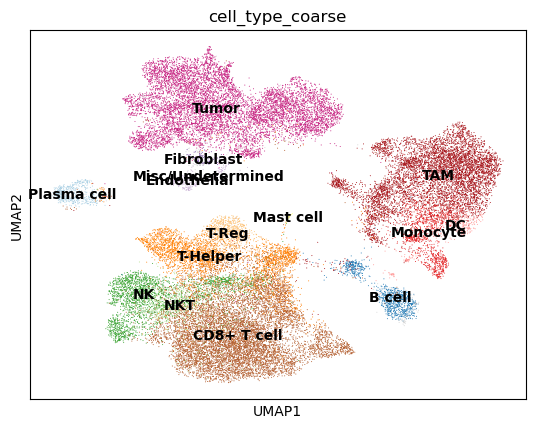

In [62]:
sc.pl.umap(
    adata,
    color="cell_type_coarse",
    palette=palette,
    size=2,
    legend_loc='on data'
)

In [63]:
# sc.pl.umap(adata, color="cell_type_coarse", palette=palette, size=2, title='', show=False)
# plt.savefig(os.path.join(PLOTS_PATH, 'sc_reference_umap.pdf'), bbox_inches='tight')
# plt.close()